In [ ]:
# Question 1: Import the required libraries
import numpy as np
import pandas as pd
%matplotlib inline
import os
import math, time, random, datetime
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from scipy.stats import kendalltau
from scipy.stats import pearsonr
from scipy import stats
import warnings
warnings.filterwarnings('ignore')



In [ ]:
# Load the training and testing dataset
cb_train = pd.read_csv('/content/train.csv')
cb_train


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012
...,...,...,...,...,...,...,...,...,...
8703,1/16/2012 6:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032
8704,11/10/2011 1:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000
8705,4/12/2011 3:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981
8706,11/7/2012 1:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979


In [ ]:
cb_test = pd.read_csv('/content/test.csv')
cb_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994
...,...,...,...,...,...,...,...,...,...
2173,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015
2175,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981


In [ ]:
cb_train_lable = pd.read_csv('/content/train_label.csv')
cb_train_lable

,504
0,5
1,139
2,209
3,184
4,791
...,...
8702,13
8703,11
8704,1
8705,92


In [ ]:
cb_test_lable = pd.read_csv('/content/test_label.csv')
cb_test_lable

,256
0,87
1,11
2,84
3,668
4,53
...,...
2172,3
2173,144
2174,159
2175,29


In [ ]:
df1 = cb_train.append(cb_train_lable, ignore_index = True)
df1

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,504
0,5/2/2012 19:00,Summer,0.0,1.0,Clear + Few clouds,22.14,25.760,77.0,16.9979,NaN
1,9/5/2012 4:00,Fall,0.0,1.0,Clear + Few clouds,28.70,33.335,79.0,19.0012,NaN
2,1/13/2011 9:00,Spring,0.0,1.0,Clear + Few clouds,5.74,6.060,50.0,22.0028,NaN
3,11/18/2011 16:00,Winter,0.0,1.0,Clear + Few clouds,13.94,16.665,29.0,8.9981,NaN
4,9/13/2011 13:00,Fall,0.0,1.0,Clear + Few clouds,30.34,33.335,51.0,19.0012,NaN
...,...,...,...,...,...,...,...,...,...,...
17410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
17411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
17412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
17413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0


In [ ]:
df2 = cb_test.append(cb_test_lable, ignore_index = True)
df2

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,256
0,5/10/2012 11:00,Summer,0.0,1.0,Clear + Few clouds,21.32,25.000,48.0,35.0008,NaN
1,6/9/2012 7:00,Summer,0.0,0.0,Clear + Few clouds,23.78,27.275,64.0,7.0015,NaN
2,3/6/2011 20:00,Spring,0.0,0.0,"Light Snow, Light Rain",11.48,12.120,100.0,27.9993,NaN
3,10/13/2011 11:00,Winter,0.0,1.0,Mist + Cloudy,25.42,28.790,83.0,0.0000,NaN
4,6/2/2012 12:00,Summer,0.0,0.0,Clear + Few clouds,25.42,31.060,43.0,23.9994,NaN
...,...,...,...,...,...,...,...,...,...,...
4350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.0
4352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159.0
4353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0


In [ ]:
# question2
#a.training dataset shape
print(df1.shape)

(17415, 10)


In [ ]:
#a.testing dataset shape
print(df2.shape)

(4355, 10)


In [ ]:
#b.print the data types of each column
df1.dtypes


datetime       object
season         object
holiday       float64
workingday    float64
weather        object
temp          float64
atemp         float64
humidity      float64
windspeed     float64
504           float64
dtype: object

In [ ]:
df2.dtypes

datetime       object
season         object
holiday       float64
workingday    float64
weather        object
temp          float64
atemp         float64
humidity      float64
windspeed     float64
256           float64
dtype: object

In [ ]:
#c.check the missing values present in the dataset
df1.isnull().sum()

datetime      8707
season        8707
holiday       8707
workingday    8707
weather       8707
temp          8707
atemp         8707
humidity      8707
windspeed     8707
504           8708
dtype: int64

In [ ]:
df2.isnull().sum()

datetime      2177
season        2177
holiday       2177
workingday    2177
weather       2177
temp          2177
atemp         2177
humidity      2177
windspeed     2177
256           2178
dtype: int64

In [ ]:
cb_train_label = pd.read_csv('/content/train_label.csv',header=None)
new_col_list=['Total_booking']
cb_train_label_rename = cb_train_label.set_axis(new_col_list, axis='columns', inplace=False)
cb_train_label_rename

,Total_booking
0,504
1,5
2,139
3,209
4,184
...,...
8703,13
8704,11
8705,1
8706,92


In [ ]:
data_append=pd.concat([cb_train, cb_train_label_rename], axis=1, ignore_index=False)
data_append

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184
...,...,...,...,...,...,...,...,...,...,...
8703,1/16/2012 6:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13
8704,11/10/2011 1:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11
8705,4/12/2011 3:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1
8706,11/7/2012 1:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92


In [ ]:
# 3.perform Feature Engineering
#a.
data_append['datetime'] = pd.to_datetime(data_append['datetime'])
data_append['date'] = data_append['datetime'].dt.date
data_append['hour'] = data_append['datetime'].dt.hour
data_append['weekday'] = data_append['datetime'].dt.weekday
data_append['month'] = data_append['datetime'].dt.month
data_append

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02,19,2,5
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05,4,2,9
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13,9,3,1
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18,16,4,11
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13,13,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,2012-01-16 06:00:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13,2012-01-16,6,0,1
8704,2011-11-10 01:00:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11,2011-11-10,1,3,11
8705,2011-04-12 03:00:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1,2011-04-12,3,1,4
8706,2012-11-07 01:00:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92,2012-11-07,1,2,11


In [ ]:
# b.coerce the datatype of season,holiday,working and weather to category
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in categoryVariableList:
    data_append[var] = data_append[var].astype("category")


In [ ]:
#c.Drop the datetime column 
data_append  = data_append.drop(["datetime"],axis=1)

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

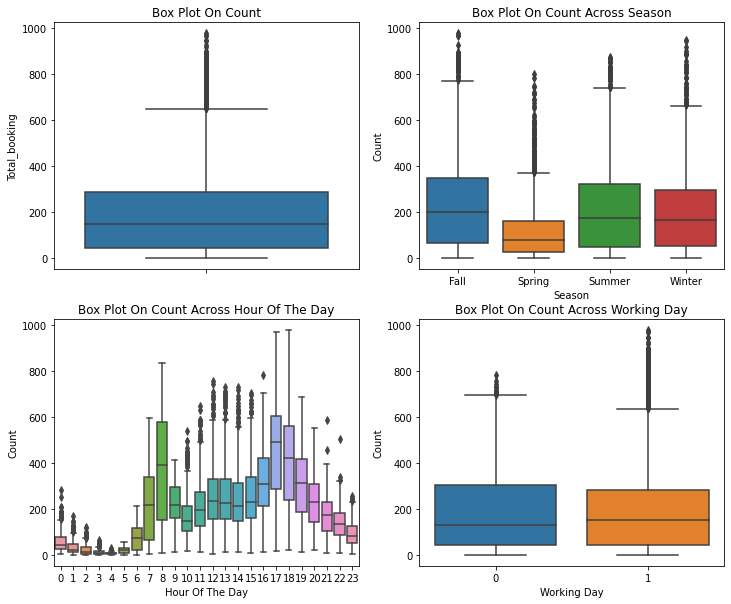

In [ ]:
#4.perform Outlier Analysis
#a 
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=data_append,y='Total_booking',orient="v", ax=axes[0][0])
sns.boxplot(data=data_append,y='Total_booking', x="season",orient="v", ax=axes[0][1])
sns.boxplot(data=data_append,y='Total_booking', x="hour", orient="v", ax=axes[1][0])
sns.boxplot(data=data_append,y='Total_booking', x="workingday", orient="v", ax=axes[1][1])

axes[0][0].set(ylabel='Total_booking',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

In [ ]:
#b.Remove the outliers present in the dataset
DataWithoutOutliers = data_append[np.abs(data_append["Total_booking"]-data_append["Total_booking"].mean())<=(3*data_append["Total_booking"].std())] 

In [ ]:
print ("Shape Of The Before Ouliers: ",data_append.shape)
print ("Shape Of The After Ouliers: ",DataWithoutOutliers.shape)

Shape Of The Before Ouliers:  (8708, 13)
Shape Of The After Ouliers:  (8591, 13)


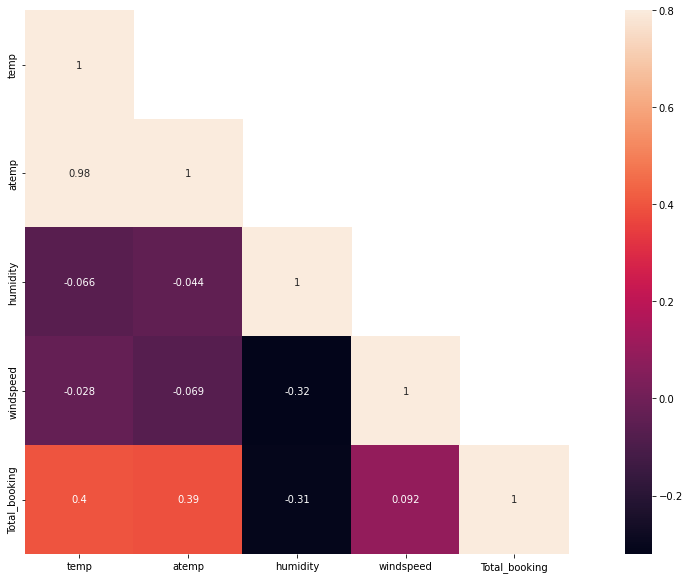

In [ ]:
# 5.Perform Correlation Analysis
corrMatt = data_append[["temp","atemp","humidity","windspeed","Total_booking"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

((array([-3.77290246, -3.54563229, -3.42075996, ...,  3.42075996,
          3.54563229,  3.77290246]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.59850903, 6.60394382,
         6.60394382])),
 (1.3448191117317756, 4.574704492098911, 0.957427556933226))

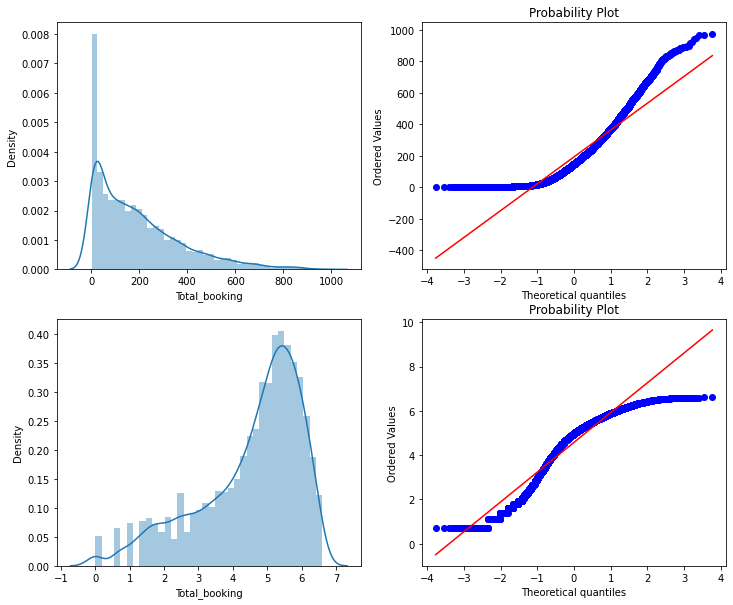

In [ ]:
#6.Perform Data Visualization
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)
sns.distplot(data_append["Total_booking"],ax=axes[0][0])
stats.probplot(data_append["Total_booking"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(DataWithoutOutliers["Total_booking"]),ax=axes[1][0])
stats.probplot(np.log1p(DataWithoutOutliers["Total_booking"]), dist='norm', fit=True, plot=axes[1][1])

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 9 Text major ticklabel objects>)

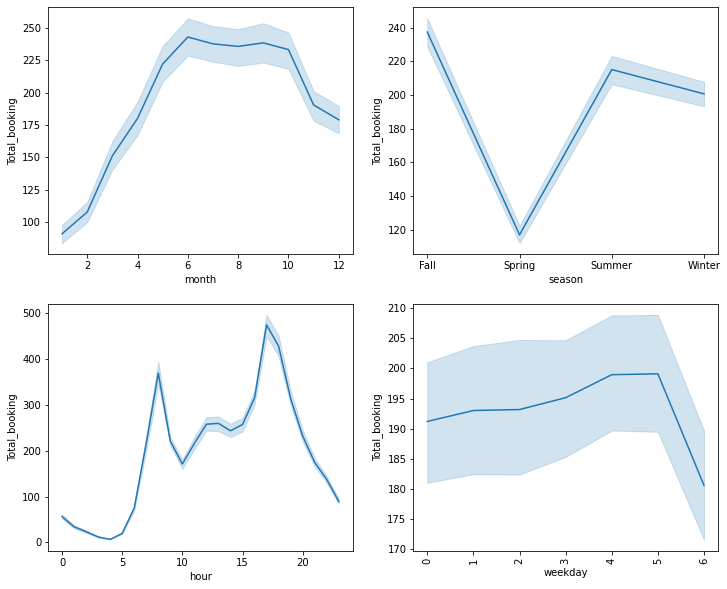

In [77]:
#b. Visualize total_booking vs (month, season, hour, weekday)
import matplotlib.pyplot as plt
import seaborn as sbn
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)
sns.lineplot(x="month", y="Total_booking",data= data_append,ax=axes[0][0])
sns.lineplot(x="season", y="Total_booking",data= data_append,ax=axes[0][1])
sns.lineplot(x="hour", y="Total_booking",data= data_append,ax=axes[1][0])
sns.lineplot(x="weekday", y="Total_booking",data= data_append,ax=axes[1][1])
plt.xticks(rotation=90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f720b1ac850>]],
      dtype=object)

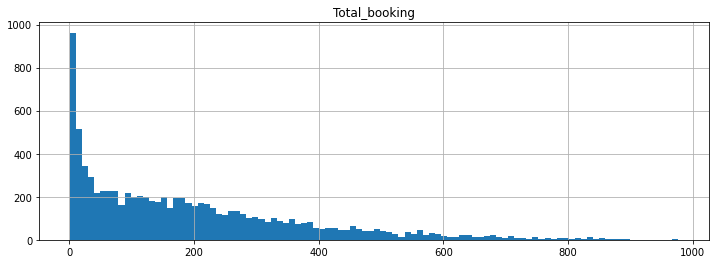

In [78]:
# c. Histogram plot
data_append.hist(column=['Total_booking'],bins=100, figsize= (12,4))


In [79]:
#7.Convert the categorical variables into one hot vector
from sklearn.preprocessing import LabelEncoder
values = list(data_append)
print(values)
print()
#integer encode
label_encoder= LabelEncoder()
integer_encoded= label_encoder.fit_transform(values)
print("Integer Encoding")
print(integer_encoded)
print()
#binary encoder
onehot_encoder= OneHotEncoder(sparse=False)
integer_encoded= integer_encoded.reshape(len(integer_encoded),1)
onehot_encoded= onehot_encoder.fit_transform(integer_encoded)
print("OneHotEncoding:")
print(onehot_encoded)
print()


['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'Total_booking', 'date', 'hour', 'weekday', 'month']

Integer Encoding
[ 7  3 12  9  8  1  5 11  0  2  4 10  6]

OneHotEncoding:
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]



In [80]:
#8.split your dataset for training and testing
from sklearn.model_selection import train_test_split
X = data_append[['hour','month']]
y = data_append['Total_booking']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state =5)

In [81]:
#9.Fit various modles
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


In [82]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X_train,y_train= make_regression(n_features=4, n_informative=2,  random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train,y_train)
print(regr.predict([[0, 0, 0, 0]]))

[-8.32987858]


In [83]:
#Ada Boost Regressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
X_train,y_train= make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train,y_train)
AdaBoostRegressor(n_estimators=100, random_state=0)
regr.score(X_train,y_train)

0.9771376939813695

In [84]:
#Bagging Regressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
X_train,y_train= make_regression(n_samples=100, n_features=4,n_informative=2, n_targets=1,random_state=0, shuffle=False)
regr = BaggingRegressor(base_estimator=SVR(),n_estimators=10, random_state=0).fit(X_train,y_train)
regr.predict([[0, 0, 0, 0]])

array([-2.87202411])

In [85]:
#SVR
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [86]:
#K-Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train,y_train)


KNeighborsRegressor(n_neighbors=2)

In [87]:
#10.Display a factor plot to visualize the RMSE values achieved by different modeling algorithm
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(data_append, test_size = 0.3)
x_test = test.drop('hour', axis = 1)
y_test = test['hour']

In [89]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  
    y_pred= model.predict(X_train) 
    error = sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.0
RMSE value for k=  2 is: 8.391185892024863
RMSE value for k=  3 is: 8.892935693760892
RMSE value for k=  4 is: 9.452965002057734
RMSE value for k=  5 is: 11.028190378080328
RMSE value for k=  6 is: 11.403388751285103
RMSE value for k=  7 is: 12.65218921266067
RMSE value for k=  8 is: 12.533500496484988
RMSE value for k=  9 is: 13.58068748759429
RMSE value for k=  10 is: 13.809645142364754
RMSE value for k=  11 is: 13.820181427947235
RMSE value for k=  12 is: 14.416643001598471
RMSE value for k=  13 is: 14.829639958193374
RMSE value for k=  14 is: 15.362529094796736
RMSE value for k=  15 is: 15.72943908707047
RMSE value for k=  16 is: 15.738926214783602
RMSE value for k=  17 is: 16.163368105857884
RMSE value for k=  18 is: 16.690851442502872
RMSE value for k=  19 is: 17.152830826466715
RMSE value for k=  20 is: 17.51989880757328


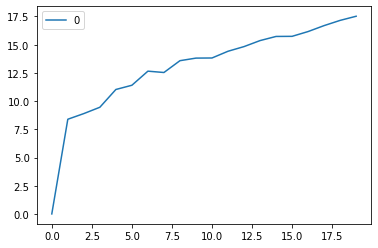

In [90]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) 
curve.plot()

In [91]:
#11.Gridsearchcv
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 3}

In [92]:
#12.mean_squared_log_error
from sklearn.metrics import mean_squared_log_error
y_true = [3, 5, 2.5, 7]
y_pred = [2.5, 5, 4, 8]
r1 = mean_squared_log_error(y_true, y_pred)
y_true = [[0.5, 1], [1, 2], [7, 6]]
y_pred = [[0.5, 2], [1, 2.5], [8, 8]]
r2 = mean_squared_log_error(y_true, y_pred)
r1,r2 

(0.03973012298459379, 0.044199361889160516)